# 3. Asking meaningful questions

**1. How does air quality differ across various seasons?**
- Answering this question will:
    - Reveal seasonal variations in air quality
    - Help understand environmental and climatic impacts on air pollution
    - Provide insights for public health and environmental policy
- How we answer this question:
    - Data Preparation:
        - Use Python with pandas for data manipulation
        - Calculate US Air Quality Index (AQI) for each measurement
        - Categorize data by seasons (Spring, Summer, Autumn, Winter)
        - Split countries into continental regions
    - Analysis Techniques:
        - Calculate average AQI for each season and continent
        - Create visualizations to demonstrate seasonal variations
        - Statistical tests to validate significant differences
- Visualization Strategy:
    - Line chart showing US_AQI trends across seasons for different regions
    - Bar chart comparing average pollutant levels by season and region

**2. What are the levels of pollution during different weather conditions?**
- Answering this question will:
    - Understand how weather parameters influence air pollution
    - Identify weather conditions associated with higher pollution levels
    - Support environmental monitoring and forecasting efforts
- How we answer this question:
    - Data Categorization:
        - Group temperature into ranges (Cold, Mild, Hot)
        - Categorize humidity levels (Low, Medium, High)
        - Classify wind speed (Calm, Moderate, Strong)
    - Analysis Approach:
        - Calculate average AQI for each weather category
        - Perform statistical analysis to determine correlations
        - Develop multi-dimensional visualization
- Visualization Strategy:
    - Heatmaps showing AQI variations across weather parameters
    - Box plots comparing pollution levels in different weather conditions

**3. What is the correlation between humidity and the ratio of PM2.5 to PM10 in different continents?**
- Answering this question will:
    - Explore relationship between humidity and particulate matter ratios
    - Understand regional differences in air pollution characteristics
    - Provide insights into atmospheric particulate interactions
- How we answer this question:
    - Data Preparation:
        - Create new column 'PM2.5/PM10' ratio
        - Group data by continent
        - Calculate Pearson correlation coefficient
    - Analysis Techniques:
        - Compute correlation between humidity and PM ratio for each continent
        - Assess statistical significance of correlations
        - Visualize correlation strengths
- Visualization Strategy:
    - Bar chart showing correlation coefficients by continent
    - Scatter plots with regression lines

**4. Which pollutants contribute the most to overall Air Pollution level in each city?**
- Answering this question will:
    - Identify primary pollution sources in different cities
    - Support targeted environmental interventions
    - Help understand urban air quality variations
- How we answer this question:
    - Data Analysis:
        - Calculate average levels for pollutants: PM2.5, PM10, NO2, SO2, CO, O3
        - Normalize pollutant concentrations
        - Rank pollutants by contribution to overall air pollution
    - Visualization Techniques:
        - Stacked bar charts for each city
        - Percentage contribution of each pollutant
        - Interactive visualizations for detailed exploration
- Visualization Strategy:
    - Stacked bar charts showing pollutant contributions
    - Radar/spider charts comparing pollutant profiles

**5. How does population density impact air quality?**
- Answering this question will:
    - Explore relationship between urban concentration and pollution
    - Provide insights for urban planning and environmental policy
    - Understand human settlement impacts on air quality
- How we answer this question:
    - Data Preparation:
        - Integrate population density data
            - Categorize cities into density groups:
            - Very Low: < 500 people/km²
            - Low: 500-1500 people/km²
            - Moderate: 1500-3000 people/km²
            - High: 3000-5000 people/km²
            - Very High: > 5000 people/km²
    - Analysis Approach:
        - Calculate average AQI for each population density category
        - Perform statistical tests to validate relationships
        - Create comparative visualizations

- Visualization Strategy:
    - Box plots showing AQI distribution across population density groups
    - Scatter plots with regression lines


# 4. Preprocessing + analyzing data to answer each question

## 4.0 Import libraries and load datasets

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('../data/global_air_quality_data_10000.csv')
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


## 4.1. How does air quality differ across various seasons?

*Preprocessing steps:*

In [4]:
def calculate_us_aqi(row):
    """
    Calculate US Air Quality Index (AQI) for a single row of data using the updated formula.
    
    Args:
        row (pd.Series): Row containing pollution measurements
    
    Returns:
        int or np.nan: Calculated AQI value
    """
    # Updated AQI breakpoints for each pollutant
    aqi_breakpoints = {
        'pm25': [
            (0, 12.0, 0, 50),
            (12.1, 35.4, 51, 100),
            (35.5, 55.4, 101, 150),
            (55.5, 150.4, 151, 200),
            (150.5, 250.4, 201, 300),
            (250.5, 350.4, 301, 400),
            (350.5, 500.4, 401, 500)
        ],
        'pm10': [
            (0, 54, 0, 50),
            (55, 154, 51, 100),
            (155, 254, 101, 150),
            (255, 354, 151, 200),
            (355, 424, 201, 300),
            (425, 504, 301, 400),
            (505, 604, 401, 500)
        ],
        'no2': [
            (0, 53, 0, 50),
            (54, 100, 51, 100),
            (101, 360, 101, 150),
            (361, 649, 151, 200),
            (650, 1249, 201, 300),
            (1250, 2049, 301, 400),
            (2050, 2749, 401, 500)
        ],
        'so2': [
            (0, 35, 0, 50),
            (36, 75, 51, 100),
            (76, 185, 101, 150),
            (186, 304, 151, 200),
            (305, 604, 201, 300),
            (605, 1004, 301, 400),
            (1005, 1504, 401, 500)
        ],
        'co': [
            (0, 4.4, 0, 50),
            (4.5, 9.4, 51, 100),
            (9.5, 12.4, 101, 150),
            (12.5, 15.4, 151, 200),
            (15.5, 30.4, 201, 300),
            (30.5, 40.4, 301, 400),
            (40.5, 50.4, 401, 500)
        ],
        'o3': [
            (0, 54, 0, 50),
            (55, 70, 51, 100),
            (71, 85, 101, 150),
            (86, 105, 151, 200),
            (106, 200, 201, 300),
            (201, 999, 301, 500)
        ]
    }
    
    def calculate_individual_aqi(c_low, c_high, aqi_low, aqi_high, concentration):
        """Calculate AQI for a single pollutant based on breakpoints."""
        return ((aqi_high - aqi_low) / (c_high - c_low)) * (concentration - c_low) + aqi_low

    def single_pollutant_aqi(pollutant, concentration):
        """Calculate AQI for a single pollutant."""
        if np.isnan(concentration):
            return np.nan
        
        for c_low, c_high, aqi_low, aqi_high in aqi_breakpoints[pollutant]:
            if c_low <= concentration <= c_high:
                return int(round(calculate_individual_aqi(c_low, c_high, aqi_low, aqi_high, concentration)))
        
        # If concentration exceeds defined range, return the maximum AQI (500)
        return 500 if concentration > aqi_breakpoints[pollutant][-1][1] else 0

    # Mapping pollutants to their column names
    pollutant_columns = {
        'pm25': ['PM2.5', 'pm25'],
        'pm10': ['PM10', 'pm10'],
        'no2': ['NO2', 'no2'],
        'so2': ['SO2', 'so2'],
        'co': ['CO', 'co'],
        'o3': ['O3', 'o3']
    }

    # Calculate AQI for each pollutant and find the maximum
    aqi_list = []
    for pollutant, col_names in pollutant_columns.items():
        for col_name in col_names:
            if col_name in row.index:
                aqi = single_pollutant_aqi(pollutant, row[col_name])
                if not np.isnan(aqi):
                    aqi_list.append(aqi)
                break
    
    # Return the maximum AQI across pollutants
    return max(aqi_list) if aqi_list else np.nan

# Apply the function to the DataFrame
df['US_AQI'] = df.apply(calculate_us_aqi, axis=1)


In [5]:
df.head(5)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,241
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,278
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,184
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,150


In [33]:
# Define seasons based on months
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = pd.to_datetime(df['Date']).dt.month.apply(assign_season)

# Define continental regions for countries (simplified for example)
region_mapping = {
    # North America
    'USA': 'North America', 
    'Canada': 'North America', 
    'Mexico': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',

    # Europe
    'Russia': 'Europe', 
    'France': 'Europe', 
    'Germany': 'Europe', 
    'UK': 'Europe', 
    'Spain': 'Europe', 
    'Turkey': 'Europe',
    
    # Asia
    'China': 'Asia', 
    'India': 'Asia', 
    'Japan': 'Asia', 
    'South Korea': 'Asia', 
    'Thailand': 'Asia', 
    'UAE': 'Asia',
    'Turkey': 'Asia',

    # Oceania
    'Australia': 'Oceania', 
    'New Zealand': 'Oceania',

    # Africa
    'South Africa': 'Africa', 
    'Egypt': 'Africa'
}
df['Region'] = df['Country'].map(region_mapping)

*Analysis steps:*

In [31]:
# Step 3: Calculate average AQI by season and region
seasonal_aqi = df.groupby(['Season', 'Region'])['US_AQI'].mean().reset_index()

# Define custom order for the seasons
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert 'Season' to a categorical type with the defined order
seasonal_aqi['Season'] = pd.Categorical(seasonal_aqi['Season'], categories=season_order, ordered=True)

# Sort the dataframe by the ordered seasons
seasonal_aqi = seasonal_aqi.sort_values('Season')

# Step 4: Visualize AQI trends across seasons for different regions
fig_line = px.line(seasonal_aqi, 
                   x='Season', 
                   y='US_AQI', 
                   color='Region',
                   title='Seasonal AQI Trends Across Regions',
                   labels={'US_AQI': 'Average AQI', 'Season': 'Season'},
                   line_shape='linear')
fig_line.show()

In [32]:
# Bar chart comparing average pollutant levels by season and region
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2']
seasonal_pollutants = df.groupby(['Season', 'Region'])[pollutants].mean().reset_index()

# Melt data for visualization
melted_pollutants = pd.melt(seasonal_pollutants, id_vars=['Season', 'Region'], 
                            value_vars=pollutants, 
                            var_name='Pollutant', value_name='Average Level')
# Ensure Season order for better visualization
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Ensure Season order
melted_pollutants['Season'] = pd.Categorical(melted_pollutants['Season'], categories=season_order, ordered=True)

fig_bar = px.bar(melted_pollutants, 
                 x='Season', 
                 y='Average Level', 
                 color='Pollutant',
                 facet_col='Region',
                 title='Average Pollutant Levels by Season and Region',
                 barmode='group',
                 labels={'Average Level': 'Average Pollutant Level (µg/m³)', 'Season': 'Season'},
                 category_orders={'Season': season_order})

fig_bar.update_layout(
    autosize=True,
    width=1000,  # Wider to accommodate additional regions
    height=500, 
    xaxis_title='Season',
    yaxis_title='Average Pollutant Level (µg/m³)',
    legend_title='Pollutant'
)
# Improve facet grid layout for better visibility
fig_bar.update_xaxes(tickangle=45)
fig_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Simplify facet titles
fig_bar.show()

**COMMENT**
---
Based on the analysis provided in the graphs:
1. Seasonal AQI Trends Across Regions
= **South America**: A noticeable spike in AQI during the winter suggests worsening air quality. This could be attributed to increased use of solid fuels for heating, as many South American regions, particularly rural areas, rely on wood or biomass for warmth during colder months. The lack of stringent air quality regulations in some parts of South America might exacerbate this issue. [1]
- **Oceania**: The general trend of declining AQI indicates relatively stable or improving air quality, yet the summer increase is an anomaly worth addressing. This could be explained by Oceania (Australia) experiences winter during summer in the northern hemisphere, heating demands rise, increasing emissions from wood and gas heaters, and bushfires occurring consecutively in Australia's winter increase PM10 [2]
- **Others**: Fluctuations in AQI across seasons are less pronounced, but underlying causes may include industrial activities, urbanization, and energy consumption patterns.

2. Average Pollutant Levels by Season and Region
- PM2.5 and PM10 levels remain consistently high across most regions, especially in Oceania, South America and Africa.
- NO2 levels show stable trends across seasons, indicating consistent sources of NO2 emissions such as traffic and industrial activities.
- SO2 levels remain relatively lower, suggesting its reduced contribution to seasonal air quality changes.

**Overall Conclusion** 
- The analysis highlights significant regional and seasonal variations in air quality, driven by diverse environmental and socio-economic factors. In South America, winter AQI spikes signal the impact of traditional heating methods and insufficient regulatory measures. In Oceania, while overall trends suggest improving air quality, summer anomalies likely linked to bushfires and heating demand underline the need for targeted mitigation strategies. Other regions show less pronounced seasonal fluctuations, but industrial activities and urban growth contribute steadily to pollutant levels.
- PM2.5 and PM10 remain persistent concerns across most regions, underscoring the need for focused air quality management to address particulate matter. Stable NO2 levels reflect ongoing emissions from transportation and industry, suggesting room for cleaner technologies and stricter enforcement. Meanwhile, lower SO2 levels provide a positive note, likely reflecting improved industrial emission controls.
- This comprehensive assessment underscores the importance of region-specific policies, enhanced monitoring systems, and global cooperation to tackle air quality challenges and safeguard public

**References**

[1] Winter wildfires smother solar in South America. [Source](https://www.pv-magazine.com/2024/08/16/winter-wildfires-smother-solar-in-south-america/) \
[2] El Nino threatens to cause bad and big bushfire year in 2023 [Source](https://www.news.com.au/technology/environment/climate-change/el-nino-threatens-to-cause-bad-and-big-bushfire-year-in-2023/news-story/d9e6c617e63c8ee258c34cd5eb386f77)

## 4.2. What are the levels of pollution during different weather conditions?


- How we answer this question:
    - Data Categorization:
        - Group temperature into ranges (Cold, Mild, Hot)
        - Categorize humidity levels (Low, Medium, High)
        - Classify wind speed (Calm, Moderate, Strong)
    - Analysis Approach:
        - Calculate average AQI for each weather category
        - Perform statistical analysis to determine correlations
        - Develop multi-dimensional visualization
- Visualization Strategy:
    - Heatmaps showing AQI variations across weather parameters
    - Box plots comparing pollution levels in different weather conditions

*Preprocessing steps:*

In [8]:
def categorize_temperature(temp):
    if temp < 15:
        return 'Cold'
    elif 15 <= temp < 25:
        return 'Cool'
    elif 25 <= temp < 30:
        return 'Moderate'
    elif 30 <= temp < 35:
        return 'Warm'
    else:
        return 'Hot'

def categorize_humidity(hum):
    if hum < 30:
        return 'Low'
    elif 30 <= hum < 60:
        return 'Moderate'
    else:
        return 'High'

def categorize_wind_speed(ws):
    if ws < 5:
        return 'Calm'
    elif 5 <= ws < 15:
        return 'Moderate'
    else:
        return 'Windy'
    
required_columns = ['Temperature', 'Humidity', 'Wind Speed', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3']
data = df.dropna(subset=required_columns)

In [9]:
# Apply categorization functions
data['Temperature_Category'] = data['Temperature'].apply(categorize_temperature)
data['Humidity_Category'] = data['Humidity'].apply(categorize_humidity)
data['Wind_Speed_Category'] = data['Wind Speed'].apply(categorize_wind_speed)

In [10]:
data.head(1)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI,Season,Region,Temperature_Category,Humidity_Category,Wind_Speed_Category
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167,Spring,Asia,Cool,Moderate,Moderate


In [11]:
avg_aqi_temp = data.groupby('Temperature_Category')['US_AQI'].mean().reset_index()
avg_aqi_humidity = data.groupby('Humidity_Category')['US_AQI'].mean().reset_index()
avg_aqi_wind = data.groupby('Wind_Speed_Category')['US_AQI'].mean().reset_index()

*Analysis steps:*

In [12]:
# Calculate the average AQI for each weather category
avg_usaqi_weather = data.groupby(
    ['Temperature_Category', 'Humidity_Category', 'Wind_Speed_Category']
)['US_AQI'].mean().reset_index()

# Visualization using Plotly
fig = px.bar(avg_usaqi_weather,
             x="Temperature_Category",
             y="US_AQI",
             color="Humidity_Category",
             facet_col="Wind_Speed_Category",
             barmode="group",
             title="Pollution Levels by Weather Conditions",
             labels={"US_AQI": "Average AQI", 
                     "Temperature_Category": "Temperature Category",
                     "Humidity_Category": "Humidity Category",
                     "Wind_Speed_Category": "Wind Speed Category"},
             category_orders={
                 "Temperature_Category": ["Cold", "Cool", "Moderate", "Warm", "Hot"],
                 "Humidity_Category": ["Low", "Moderate", "High"],
                 "Wind_Speed_Category": ["Calm", "Moderate", "Windy"]
             })

# Layout customization
fig.update_layout(
    title_x=0.5,
    height=500,
    bargap=0.2
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

## 4.3. What is the correlation between humidity and the ratio of PM2.5 to PM10 in different continents?


- How we answer this question:
    - Data Preparation:
        - Create new column 'PM2.5/PM10' ratio
        - Group data by continent
        - Calculate Pearson correlation coefficient
    - Analysis Techniques:
        - Compute correlation between humidity and PM ratio for each continent
        - Assess statistical significance of correlations
        - Visualize correlation strengths
- Visualization Strategy:
    - Bar chart showing correlation coefficients by continent
    - Scatter plots with regression lines

*Preprocessing steps:*

In [13]:
from scipy.stats import pearsonr
df['PM2.5/PM10'] = df['PM2.5'] / df['PM10']

def calculate_correlation(df, x_col, y_col, group_col):
    """
    Calculate Pearson correlation for each group in a DataFrame.

    Args:
        df (pd.DataFrame): Input data
        x_col (str): Independent variable (e.g., Humidity)
        y_col (str): Dependent variable (e.g., PM2.5/PM10 ratio)
        group_col (str): Column to group by (e.g., Continent)

    Returns:
        pd.DataFrame: Correlation coefficients and p-values for each group
    """
    correlations = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        if len(group_data) > 2:  # Ensure enough data for correlation
            corr, p_value = pearsonr(group_data[x_col], group_data[y_col])
            correlations.append({'Continent': group, 'Correlation': corr, 'P-Value': p_value})
    return pd.DataFrame(correlations)


In [14]:
correlation_results = calculate_correlation(df, x_col='Humidity', y_col='PM2.5/PM10', group_col='Region')

*Analysis steps:*

In [15]:
fig_bar = px.bar(correlation_results, 
                 x='Continent', 
                 y='Correlation', 
                 color='Correlation',
                 title='Correlation Between Humidity and PM2.5/PM10 Ratio by Continent',
                 labels={'Correlation': 'Pearson Correlation Coefficient', 'Continent': 'Continent'},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig_bar.show()

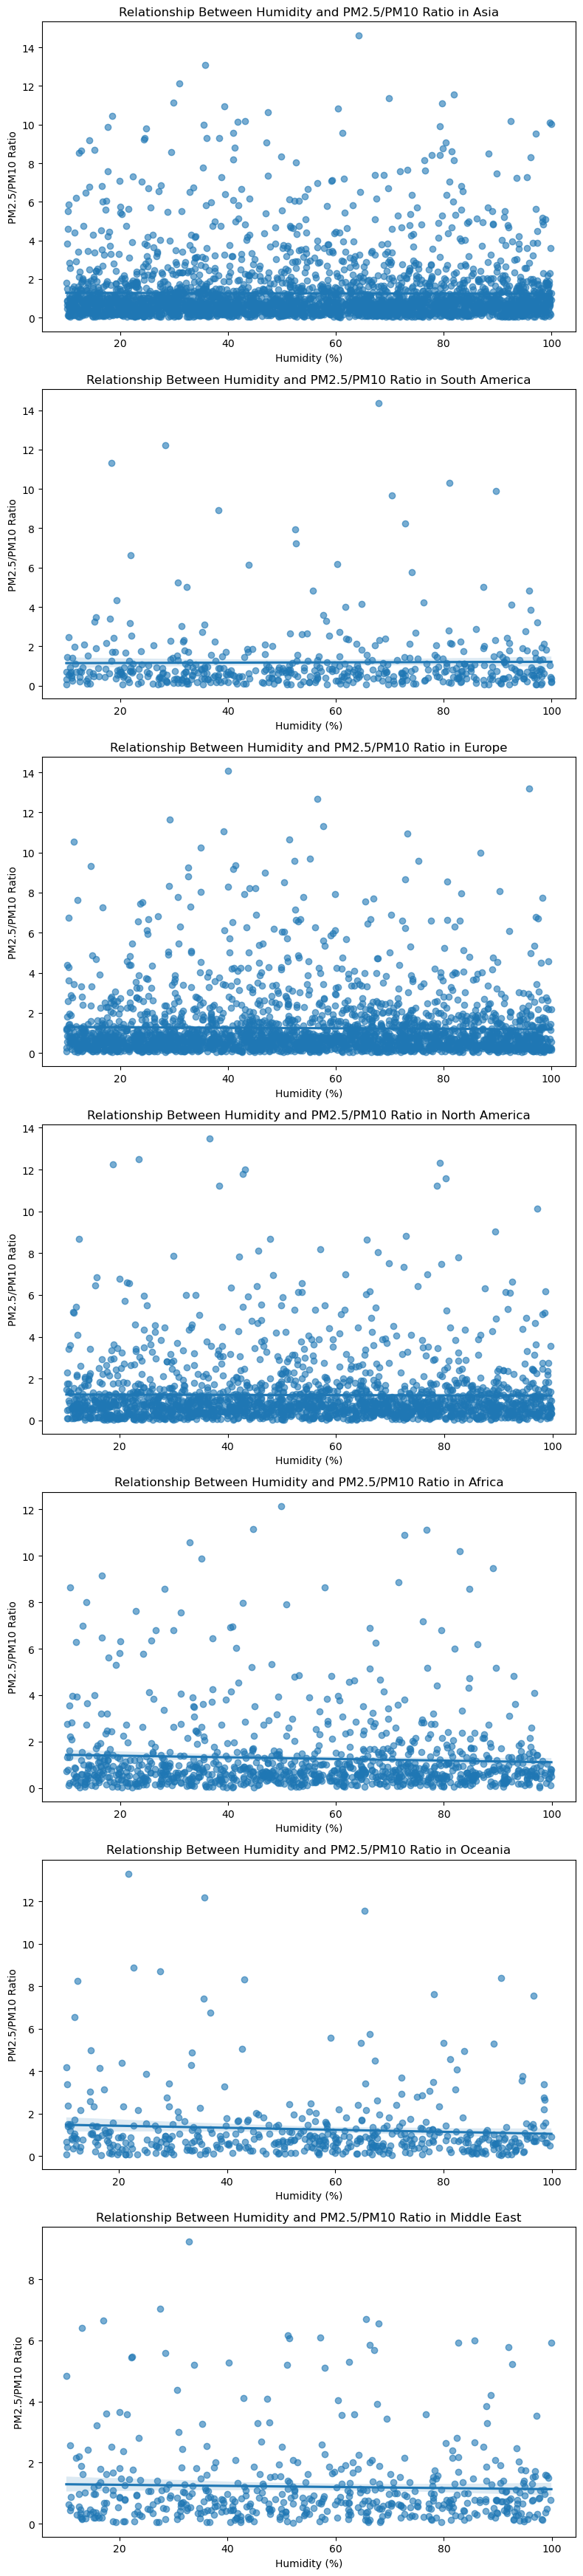

In [16]:
continents = df['Region'].unique()
fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(8, 5 * len(continents)))

if len(continents) == 1:  # If only one continent exists
    axes = [axes]

for i, continent in enumerate(continents):
    continent_data = df[df['Region'] == continent]
    sns.regplot(x='Humidity', y='PM2.5/PM10', data=continent_data, ax=axes[i], scatter_kws={'alpha': 0.6})
    axes[i].set_title(f'Relationship Between Humidity and PM2.5/PM10 Ratio in {continent}')
    axes[i].set_xlabel('Humidity (%)')
    axes[i].set_ylabel('PM2.5/PM10 Ratio')

plt.tight_layout()
plt.show()

## 4.4. Which pollutants contribute the most to overall Air Pollution level in each city?

*Analysis steps:*

In [17]:
pollutant_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
city_pollutants = data.groupby('City')[pollutant_columns].mean().reset_index()

# Melt the dataframe to a long format for visualization
city_pollutants_melted = city_pollutants.melt(id_vars='City', 
                                              value_vars=pollutant_columns, 
                                              var_name='Pollutant', 
                                              value_name='Average Level')

# Step 8: Visualize pollutant contributions per city
fig_pollutants = px.bar(city_pollutants_melted, 
                        x='City', 
                        y='Average Level',
                        color='Pollutant',
                        title='Average Pollutant Contribution to Air Pollution Level in Each City',
                        labels={'Average Level': 'Average Pollutant Level (µg/m³)', 'City': 'City'},
                        barmode='group',
                        color_discrete_sequence=px.colors.qualitative.Set1)
fig_pollutants.update_layout(template='plotly')
fig_pollutants.show()

## 4.5. How does population density impact air quality?
- Answering this question will:
    - Explore relationship between urban concentration and pollution
    - Provide insights for urban planning and environmental policy
    - Understand human settlement impacts on air quality
- How we answer this question:
    - Data Preparation:
        - Integrate population density data
        - Categorize cities into density groups:
            - Very Low: < 500 people/km²
            - Low: 500-1500 people/km²
            - Moderate: 1500-3000 people/km²
            - High: 3000-5000 people/km²
            - Very High: > 5000 people/km²
    - Analysis Approach:
        - Calculate average AQI for each population density category
        - Perform statistical tests to validate relationships
        - Create comparative visualizations

- Visualization Strategy:
    - Box plots showing AQI distribution across population density groups
    - Scatter plots with regression lines

*Preprocessing steps:*

In [18]:
# ref: https://worldpopulationreview.com/cities
world_city_df = [
    ["Bangkok", "Thailand", 11070000, 1568.7],
    ["Istanbul", "Turkey", 15847800, 5461],
    ["Rio de Janeiro", "Brazil", 13727700, 1182.3],
    ["Mumbai", "India", 21296500, 603.4],
    ["Paris", "France", 11208400, 105.4],
    ["Los Angeles", "USA", 3820914, 1302],
    ["Tokyo", "Japan", 37194100, 2191],
    ["New York", "USA", 8258035, 783.8],
    ["London", "UK", 9648110, 1572],
    ["Seoul", "South Korea", 9988050, 605.2],
    ["Cairo", "Egypt", 22183200, 3085],
    ["Mexico City", "Mexico", 22281400, 1485],
    ["Berlin", "Germany", 3573940, 891.8],
    ["Beijing", "China", 21766200, 16410.5],
    ["Sydney", "Australia", 5120890, 12368],
    ["Dubai", "UAE", 3007580, 4114],
    ["Toronto", "Canada", 6371960, 630.2],
    ["Madrid", "Spain", 6751370, 604.3],
    ["Johannesburg", "South Africa", 6198020, 1644.98],
    ["Moscow", "Russia", 12680400, 2561.5]
]

world_city_df = pd.DataFrame(world_city_df, columns=['City', 'Country', 'Population', 'Area'])

# Calculate population density
world_city_df['Population Density'] = world_city_df['Population'] / world_city_df['Area']

In [19]:
def categorize_population_density(density):
    if density < 500:
        return 'Very Low'
    elif 500 <= density < 1000:
        return 'Low'
    elif 1000 <= density < 5000:
        return 'Moderate'
    elif 5000 <= density < 10000:
        return 'High'
    else:
        return 'Very High'
    
data['Population Density'] = world_city_df['Population Density'].copy()
data['Population Density Category'] = world_city_df['Population Density'].apply(categorize_population_density)
data.head(5)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI,Season,Region,Temperature_Category,Humidity_Category,Wind_Speed_Category,Population Density,Population Density Category
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167,Spring,Asia,Cool,Moderate,Moderate,7056.798623,High
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,241,Winter,Asia,Cold,High,Moderate,2901.995971,Moderate
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,278,Autumn,South America,Moderate,Low,Moderate,11611.012433,Very High
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,184,Spring,Asia,Cool,High,Moderate,35294.166390,Very High
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,150,Spring,Europe,Cool,High,Moderate,106341.555977,Very High


*Analysis steps:*

In [20]:
# Calc summary statistics for each density cate
summary_stats = data.groupby('Population Density Category')['US_AQI'].agg([
    'mean', 'median', 'std', 'count'
]).round(2).reindex(['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Perform one-way ANOVA 
density_groups = [group for _, group in data.groupby('Population Density Category')['US_AQI']]
f_stat, p_value = stats.f_oneway(*density_groups)

# Calculate correlation
correlation = data['Population Density'].corr(data['US_AQI'])

print("Summary Statistics by Density Category:")
print(summary_stats)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"\nCorrelation coefficient: {correlation:.2f}")

Summary Statistics by Density Category:
                               mean  median    std  count
Population Density Category                              
Very Low                     153.00   153.0    NaN      1
Low                          227.00   227.0    NaN      1
Moderate                     203.67   199.5  38.85      6
High                         205.67   169.0  65.25      3
Very High                    187.56   184.0  46.27      9

ANOVA Results:
F-statistic: 0.46
p-value: 0.7635

Correlation coefficient: -0.26


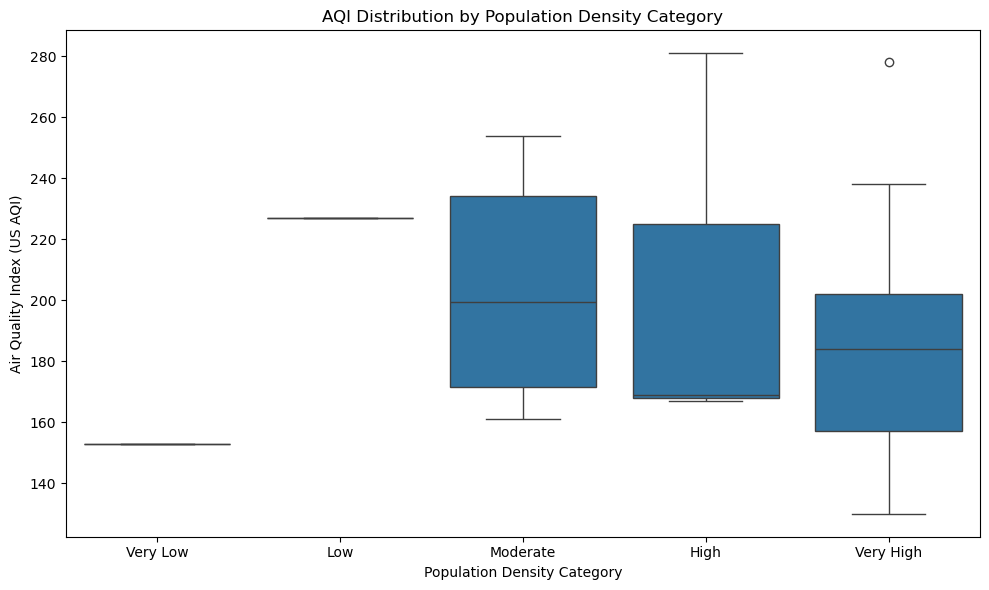

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Population Density Category',
    y='US_AQI',
    data=data,
    order=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)
plt.title('AQI Distribution by Population Density Category')
plt.xlabel('Population Density Category')
plt.ylabel('Air Quality Index (US AQI)')
plt.tight_layout()
plt.show()

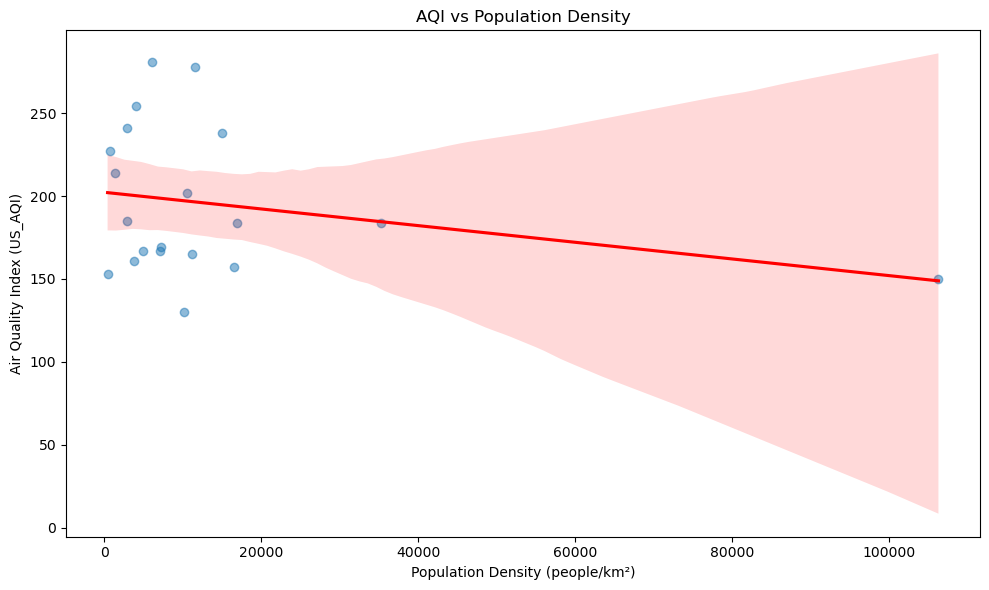

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Population Density',
    y='US_AQI',
    data=data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('AQI vs Population Density')
plt.xlabel('Population Density (people/km²)')
plt.ylabel('Air Quality Index (US_AQI)')
plt.tight_layout()
plt.show()

**COMMENT**
---
Based on the above analysis and statistics, we can observe these insights below:

1. Statistical Summary:
- The f-statistic = 0.46 and p-value = 0.7635 indicate that there is no statistically significant difference between the AQI of different population density groups. This means that the impact of population density on air quality is not clear and may be influenced by other factors.
- The standard deviation (std) shows the highest AQI variability in the "High" group (65.25), indicating that air quality is unstable in this group. The "Very High" group is more stable with std = 46.27.
- The weak negative correlation coefficient indicates an inverse relationship between population density and AQI: as population density increases, AQI tends to decrease slightly. However, the value of -0.26 is quite small, indicating that this relationship is not strong.

2. Box Plot Analysis:
- `Very Low` and `Low`: Data for these two groups is quite limited, with only one value for each group, making it difficult to draw accurate conclusions. However, the AQI values in these groups are relatively high (153 and 227), indicating poor air quality.
- `Moderate`: This group has the widest AQI distribution, with a median value (199.5) close to the mean (203.67). This indicates that air quality in the moderate population density group is quite variable.
- `High`: Although the mean AQI of this group (205.67) is higher than the "Very High" group (187.56), the median (169) is significantly lower, indicating a considerable difference between high and low values in the data.
- `Very High`: This group has a relatively even AQI distribution and lower values compared to other groups, with a median (184) and mean (187.56) that are quite close. This may indicate that in areas with very high population density, air quality control may be more effective.

3. Scatter Plot Analysis:
- The regression line has a slight slope and the distribution is quite wide. This reinforces the conclusion that population density is not a major determinant of AQI. The scattered data points suggest that many other factors may influence air quality.

**Overall Conclusion** 
- Impact of population density on AQI:
    - Although there is a slight trend of decreasing AQI with increasing population density, this impact is not clear and not statistically significant.
    - The results show that areas with very high population density have relatively lower AQI. This may be explained by better environmental control in densely populated cities or the nature of economic activities in different areas.
        - Industrial zones and manufacturing areas are often located in relatively less populated areas, contributing to higher AQI in those regions.
        - Cities and densely populated regions typically have stricter environmental management and laws to control pollution, such as using public transportation and limiting industrial pollution.
        - Examples:
            - New York (USA): Measures to reduce vehicle emissions and improve heating systems have significantly reduced PM2.5 levels. [1][2]
            - Tokyo (Japan): Strict emission policies and air filtration technologies have helped maintain low PM2.5 levels. [3][4]


**References**

[1] Vehicle Emission Standards: The New York State Department of Environmental Conservation has proposed amendments to emission standards for motor vehicles, aiming to further reduce pollutants contributing to PM2.5 levels. [Source](https://www.c40.org/case-studies/cities100-new-york-city-retrofitting-trucks-for-cleaner-air)

[2] Retrofitting Programs: Initiatives to retrofit trucks have resulted in annual reductions of nitrogen oxides (NOx) by 90% and particulate matter (PM) emissions, contributing to improved air quality. [Source](https://dec.ny.gov/sites/default/files/2024-01/218act.pdf)

[3] Emission Control Measures: Studies indicate that black carbon (BC) and PM2.5 concentrations at non-roadside stations in central Tokyo decreased by 70% and 35%, respectively, during 2003–2010, following the implementation of stringent emission control measures. [Source](https://pmc.ncbi.nlm.nih.gov/articles/PMC7167368/)

[4] Air Quality Standards: Japan has established environmental quality standards for PM2.5, with an annual standard of less than or equal to 15.0 µg/m³ and a 24-hour standard of less than or equal to 35 µg/m³, guiding policies to maintain low PM2.5 levels. [Source](https://www.env.go.jp/en/air/aq/aq.html)